In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns

In [75]:
df = pd.read_csv('auto_ru_res_test-Copy1.csv')
df.drop(columns='url', inplace=True)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76089 entries, 0 to 76088
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   car_mark         76089 non-null  object
 1   Цена             76089 non-null  object
 2   Год              76089 non-null  int64 
 3   Пробег           76089 non-null  object
 4   Двигатель        76089 non-null  object
 5   Привод           76089 non-null  object
 6   Кузов            76089 non-null  object
 7   Цвет             76089 non-null  object
 8   Коробка передач  76089 non-null  object
 9   brand            76089 non-null  object
dtypes: int64(1), object(9)
memory usage: 5.8+ MB


Начало препроцессинга

In [77]:
s = df['Цена']
s = s.str.replace('₽', '')
s = s.str.replace('от ', '')
s = s.str.replace('\xa0', '')
s = s.astype(int)
df['Цена'] = s

In [78]:
s = df['Пробег']
s = s.str.replace('км', '')
s = s.str.replace('\xa0', '')
s = s.str.replace('Новый', '0')
s = s.astype(int)
df['Пробег'] = s

In [79]:
# У двигателя есть объем мощность и тип
s = df['Двигатель']
s = pd.DataFrame(s.str.split('/', expand=True).values, columns=['Объем', 'Мощность', 'Тип'])
s.loc[s['Объем'].str.find('л.с.') != -1 , 'Мощность'] = s.loc[s['Объем'].str.find('л.с.') != -1 ,'Объем']
s.loc[s['Тип'].str.find('Электро') != -1 , 'Объем'] = 0

s['Объем'] = s['Объем'].str.replace(' л\u2009','').str.replace('\xa0','').str.replace('л.с.\u2009','')


s['Мощность'] = s['Мощность'].str.replace('\u2009','').str.replace('\xa0','').str.replace('л.с.','').str.replace('кВт','')


#types = ['\u2009Бензин', '\u2009Дизель', '\u2009Электро', '\u2009Гибрид', '\u2009Газ']
# ordinal_encoder = OrdinalEncoder(handle_unknown='error')
# ordinal_encoder.fit(types)
# ordinal_encoder.transform(s['Тип'])

s['Тип'] = s['Тип'].str.replace('\u2009','')

df[s.columns] = s.values
df['Мощность'] = df['Мощность'].astype(int)
df['Объем'] = df['Объем'].astype(float)
df = df.fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.


In [80]:
#ЦВЕТ В БОЛЬШОЙ ЖОПЕ

df['Цвет'].value_counts().loc[ df['Цвет'].value_counts() > 500]

чёрный         15219
белый          11643
серый           8634
синий           5968
серебристый     4922
красный         3120
коричневый      2586
зелёный         1971
бежевый         1087
Flagship         928
голубой          736
жёлтый           702
Prestige         697
Elite            696
Active           655
Style            640
Comfort          569
Intense+         564
Name: Цвет, dtype: int64

In [81]:
# Коробка передач в электро показывает насколько большой заряд

df['Коробка передач'].value_counts()
#(df.loc[df['Коробка передач'].str.find('Заряд') != -1 , 'Тип']).count()

автомат            39858
механика           17389
робот              10180
вариатор            8176
Заряд на 436 км       57
                   ...  
Заряд на 484 км        1
Заряд на 593 км        1
Заряд на 472 км        1
Заряд на 550 км        1
Заряд на 706 км        1
Name: Коробка передач, Length: 73, dtype: int64

In [82]:
# Кузов

df['Кузов'].value_counts()

внедорожник 5 дв.          34568
седан                      20537
хэтчбек 5 дв.               7056
лифтбек                     3902
универсал 5 дв.             2776
купе                        1500
минивэн                     1353
хэтчбек 3 дв.               1204
компактвэн                  1093
пикап двойная кабина         495
внедорожник 3 дв.            420
фургон                       352
кабриолет                    271
родстер                      128
микровэн                     107
внедорожник открытый          85
седан 2 дв.                   79
купе-хардтоп                  55
тарга                         28
пикап одинарная кабина        25
фастбек                       19
лимузин                       12
пикап полуторная кабина        9
хэтчбек 4 дв.                  5
спидстер                       5
седан-хардтоп                  4
фаэтон                         1
Name: Кузов, dtype: int64

In [83]:
df.drop(df[df['Тип'] == 'Электро'].index, inplace=True)
df.drop(columns=['Кузов', 'Двигатель','Привод'], inplace=True)


#ПОКАЧТО
df.drop(columns=['Коробка передач', 'Цвет'], inplace=True)

In [84]:
#Разделение на категории и чиселки
df_numerical = df.select_dtypes(include = [np.number])
df_categorical = df.select_dtypes(exclude = [np.number])

In [105]:
col = df_categorical.columns
for TMP in col:
  print(TMP, df_categorical[TMP].unique())

car_mark ['Acura MDX III' 'Acura Integra III' 'Acura RDX III' ... 'УАЗ 3153 3153'
 'УАЗ Hunter 315143' 'УАЗ Pickup I']
brand ['Acura' 'Alfa Romeo' 'Alpina' 'AMC' 'Asia' 'Aston Martin' 'Auburn' 'Audi'
 'Aurus' 'Bajaj' 'Bentley' 'BMW' 'Brilliance' 'Buick' 'BYD' 'Cadillac'
 'Changan' 'Chery' 'Chevrolet' 'Chrysler' 'Citroen' 'Dacia' 'Dadi'
 'Daewoo' 'Daihatsu' 'Daimler' 'Datsun' 'Delage' 'Derways' 'Dodge'
 'DongFeng' 'Eagle' 'EXEED' 'Facel Vega' 'FAW' 'Ferrari' 'Fiat' 'Ford'
 'GAC' 'Geely' 'Genesis' 'Geo' 'GMC' 'Goggomobil' 'Great Wall' 'Hafei'
 'Haima' 'Haval' 'Hawtai' 'Honda' 'HuangHai' 'Hummer' 'Hyundai' 'Infiniti'
 'Iran Khodro' 'Isuzu' 'JAC' 'Jaguar' 'Jeep' 'Jinbei' 'Kia' 'LADA (ВАЗ)'
 'Lamborghini' 'Lancia' 'Land Rover' 'Lexus' 'Lifan' 'Lincoln' 'LiXiang'
 'Lotus' 'Maserati' 'Maybach' 'Mazda' 'McLaren' 'Mercedes-Benz' 'Mercury'
 'MG' 'MINI' 'Mitsubishi' 'Mitsuoka' 'Morgan' 'Nissan' 'Oldsmobile' 'Opel'
 'Packard' 'Plymouth' 'Pontiac' 'Porsche' 'Proton' 'PUCH' 'RAM' 'Ravon'
 'Renault' 

In [107]:
df_numerical

,Цена,Год,Пробег,Объем,Мощность
0,2450000,2014,219000,3.5,290
1,1000000,1994,40000,1.8,170
2,3190000,2019,7000,2.0,272
3,1050000,2006,220000,3.7,300
4,3549807,2014,90500,3.5,290
...,...,...,...,...,...
76084,190000,2001,200000,2.9,84
76085,369000,2008,77000,2.7,128
76086,250000,2005,89000,2.9,84
76087,950000,2019,300000,2.7,150


Анализ

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe()

,Цена,Год,Пробег,Объем,Мощность
count,75600.000,75600.000,75600.000,75600.000,75600.000
mean,2710196.042,2014.295,98138.403,2.190,176.769
std,4255035.460,8.135,97393.500,0.923,92.725
min,20000.000,1923.000,0.000,0.200,8.000
25%,730000.000,2010.000,1700.000,1.600,117.000
50%,1562578.500,2016.000,80199.500,2.000,150.000
75%,2968000.000,2021.000,159853.750,2.500,200.000
max,120000000.000,2022.000,1000000.000,8.300,1000.000


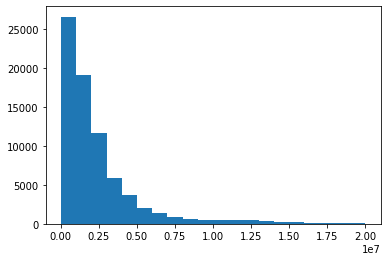

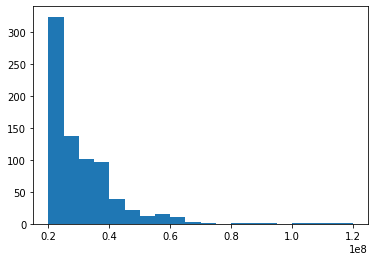

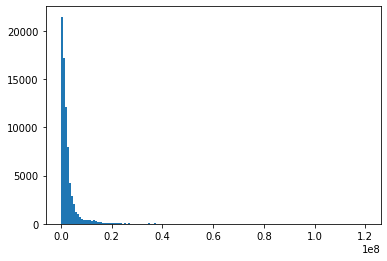

In [ ]:
plt.hist(df.loc[df['Цена'] < 20000000 , 'Цена'], bins = 20)
plt.show()
plt.hist(df.loc[df['Цена'] > 20000000 , 'Цена'], bins = 20)
plt.show()
plt.hist(df['Цена'], bins = 150)
plt.show()


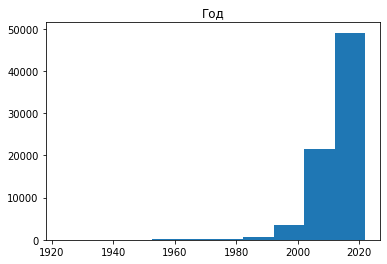

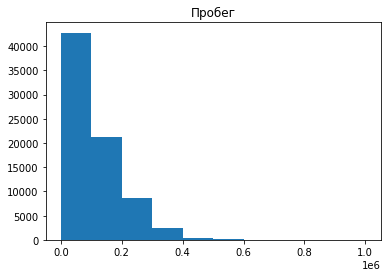

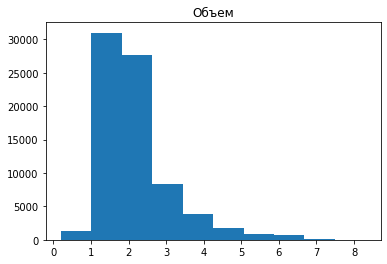

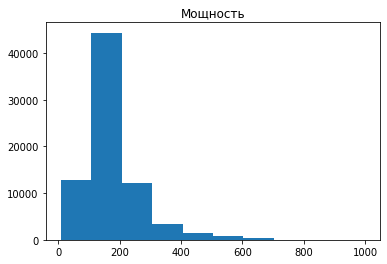

In [ ]:
plt.hist(df['Год'])
plt.title('Год')
plt.show()
plt.hist(df['Пробег'])
plt.title('Пробег')
plt.show()
plt.hist(df['Объем'])
plt.title('Объем')
plt.show()
plt.hist(df['Мощность'])
plt.title('Мощность')
plt.show()

,Цена,Год,Пробег,Объем,Мощность
Цена,1.000,0.304,-0.350,0.435,0.629
Год,0.304,1.000,-0.617,-0.084,0.157
Пробег,-0.350,-0.617,1.000,0.067,-0.104
Объем,0.435,-0.084,0.067,1.000,0.820
Мощность,0.629,0.157,-0.104,0.820,1.000


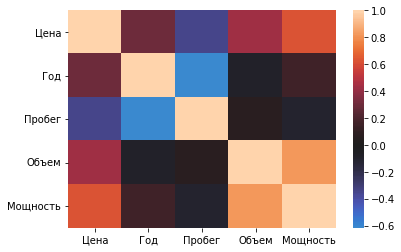

In [ ]:
sns.heatmap(df.corr(), center=0)
df.corr() 

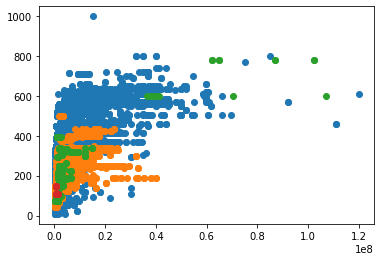

In [ ]:
types = ['Бензин', 'Дизель', 'Гибрид', 'Газ']
#plt.scatter(df['Цена'], df['Мощность'], c = 'red')
for Param in range(4):
  plt.scatter(df.loc[df['Тип'] == types[Param] , 'Цена'], df.loc[df['Тип'] == types[Param] , 'Мощность'])

In [ ]:
df['Тип'].unique

array(['Бензин', 'Дизель', 'Гибрид', 'Газ'], dtype=object)